In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [180]:
df = pd.read_csv('/content/insurance.csv')

In [181]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [182]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [184]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [185]:
df.shape

(1338, 7)

In [186]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [187]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [188]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [189]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [190]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [191]:
df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

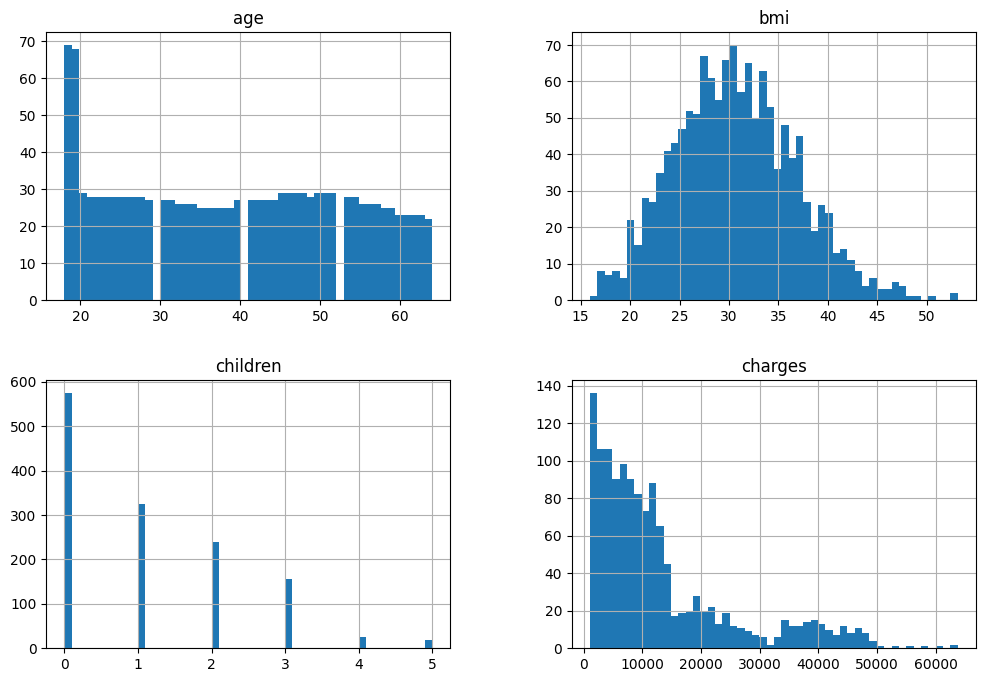

In [192]:
df.hist(bins=50, figsize=(12, 8))
plt.show()

In [193]:
df.corr()

<ipython-input-193-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<ipython-input-194-5d41701dda51>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

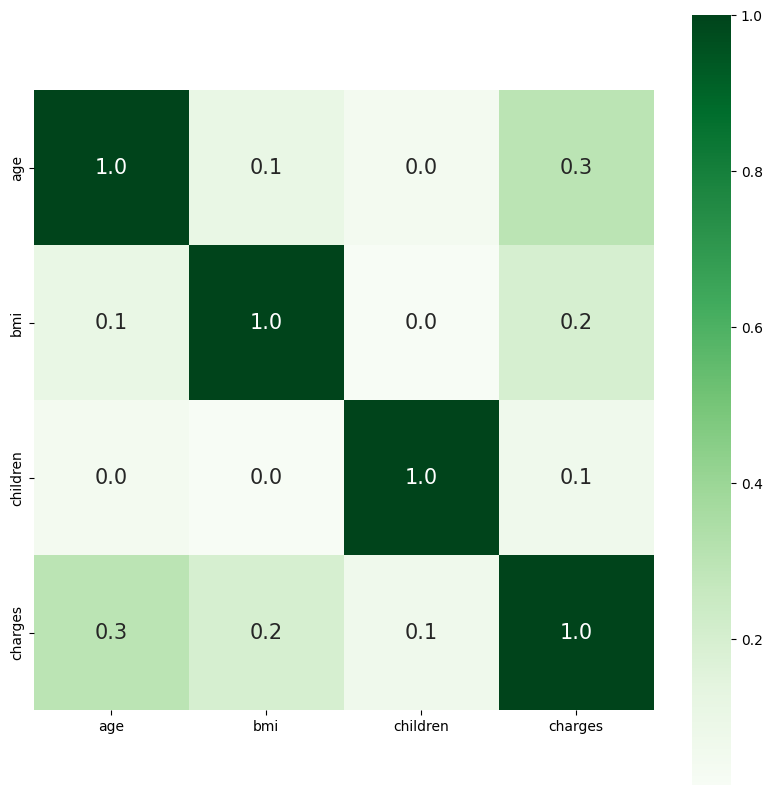

In [194]:
# Finding out the correlation between the features
corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [195]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [196]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### **Sex**

In [197]:
male_charges = df[df['sex'] == 'female']['charges'].sum()
male_charges

8321061.194619

In [198]:
female_charges = df[df['sex'] == 'male']['charges'].sum()
female_charges

9434763.79614

In [199]:
max(male_charges, female_charges)

9434763.79614

In [200]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [201]:
df_sex_children = df.groupby(['sex', 'children'])['charges'].median()
df_sex_children

sex     children
female  0            9541.695550
        1            8232.868150
        2           10107.220600
        3           11085.586800
        4           11033.661700
        5            8781.311775
male    0           10214.636000
        1            8734.352500
        2            8603.823400
        3           10414.975850
        4           11128.485300
        5            6732.850500
Name: charges, dtype: float64

### **Region**

In [202]:
southwest_charges = df[df['region'] == 'southwest']['charges'].sum()
southwest_charges

4012754.6476200004

In [203]:
southeast_charges = df[df['region'] == 'southeast']['charges'].sum()
southeast_charges

5363689.763289999

In [204]:
northwest_charges = df[df['region'] == 'northwest']['charges'].sum()
northwest_charges

4035711.9965399997

In [205]:
northeast_charges = df[df['region'] == 'northeast']['charges'].sum()
northeast_charges

4343668.583309

<Axes: >

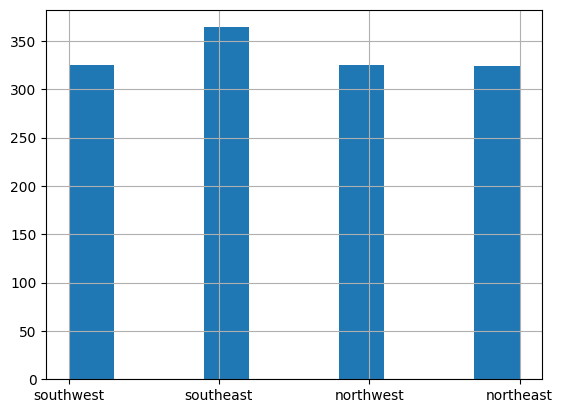

In [206]:
df['region'].hist()

### **BMI**

In [207]:
df.groupby('bmi')['charges'].median()

bmi
15.960     1694.79640
16.815     4904.00035
17.195    14455.64405
17.290     6877.98010
17.385     2775.19215
             ...     
48.070     9432.92530
49.060    11381.32540
50.380     2438.05520
52.580    44501.39820
53.130     1163.46270
Name: charges, Length: 548, dtype: float64

In [208]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [209]:
df.corr()

<ipython-input-209-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<ipython-input-210-463e7a73f5f7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

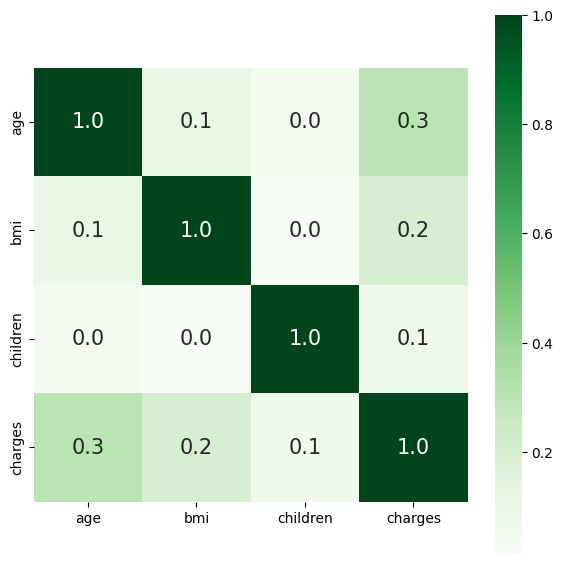

In [210]:
# Finding out the correlation between the features
corr = df.corr()

plt.figure(figsize=(7,7))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [211]:
corr.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [212]:
df_charges = corr['charges'].sort_values()

In [213]:
df_charges = df_charges.reset_index()

In [214]:
df_charges

,index,charges
0,children,0.067998
1,bmi,0.198341
2,age,0.299008
3,charges,1.000000


Text(0, 0.5, 'charges')

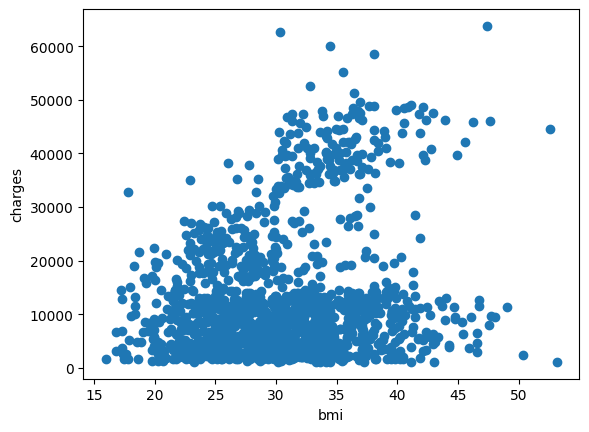

In [215]:
plt.scatter(df['bmi'], df['charges'])
plt.xlabel('bmi')
plt.ylabel('charges')

Text(0, 0.5, 'charges')

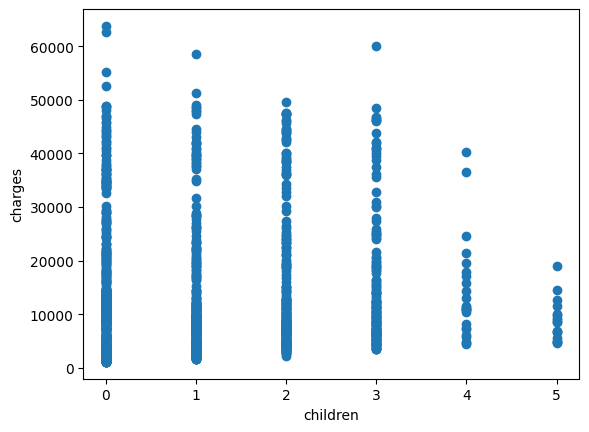

In [216]:
plt.scatter(df['children'], df['charges'])
plt.xlabel('children')
plt.ylabel('charges')

Text(0, 0.5, 'charges')

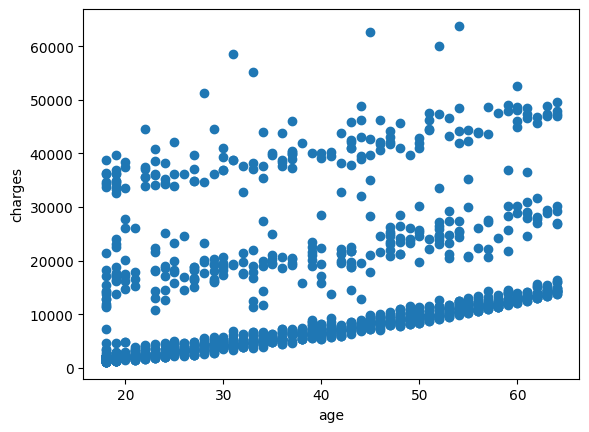

In [217]:
plt.scatter(df['age'], df['charges'])
plt.xlabel('age')
plt.ylabel('charges')

In [218]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [219]:
from sklearn.preprocessing import StandardScaler

def std_col(df, col):
    scaler = StandardScaler()
    transformed_data = scaler.fit_transform(df[[col]].values.reshape(-1, 1))
    df[col] = transformed_data
    return df[col]

In [220]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [221]:
# df['age'] = std_col(df, 'age')
df['bmi'] = std_col(df, 'bmi')
df['charges'] = std_col(df, 'charges')

In [222]:
df.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,female,-0.453320,0,yes,southwest,0.298584
1,18,male,0.509621,1,no,southeast,-0.953689
2,28,male,0.383307,3,no,southeast,-0.728675
3,33,male,-1.305531,0,no,northwest,0.719843


<Axes: >

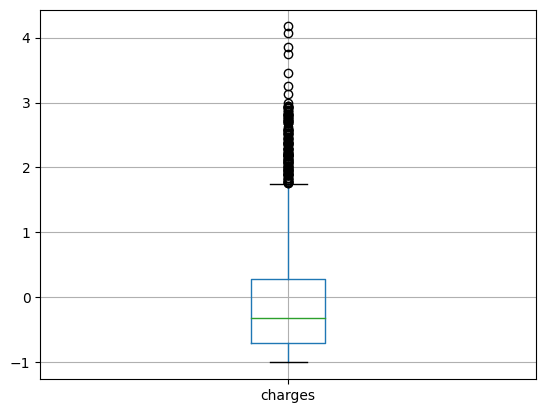

In [223]:
df.boxplot('charges')

## **Modeling with single feature**

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [225]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [226]:
from sklearn.model_selection import train_test_split

### **Smoking=yes and age**

In [227]:
smoker_df = df[df['smoker'] == 'yes']
smoker_df.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,female,-0.453320,0,yes,southwest,0.298584
11,62,female,-0.717432,0,yes,southeast,1.200968
14,27,male,1.881033,0,yes,southeast,2.175983
19,30,male,0.760609,0,yes,southwest,1.946807


In [229]:
inputs = smoker_df[['age']]
targets = smoker_df.charges
print('',inputs.shape)
print('',targets.shape)

 (274, 1)
 (274,)


In [287]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2)

In [288]:
model = LinearRegression()

In [289]:
model.fit(X_train, y_train)

LinearRegression()

In [290]:
predictions = model.predict(X_test)

In [ ]:
predictions

In [ ]:
y_test

In [292]:
mean_squared_error(y_test, predictions)

0.7897512224571384

In [293]:
print("w : ", model.coef_)
print("b : ", model.intercept_)

w :  [0.02657282]
b :  0.5091066698765498


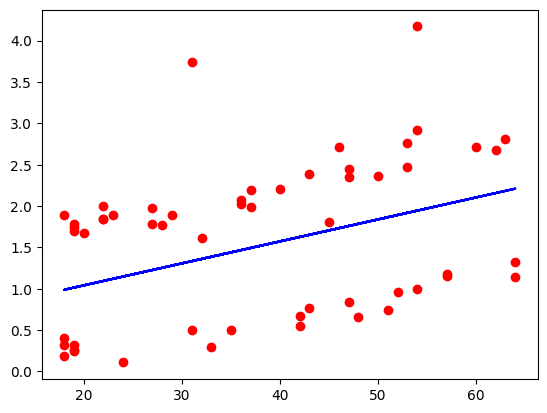

In [294]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, predictions, color = 'blue')

### **Smoking=no and age**

In [295]:
non_smoker_df = df[df['smoker'] == 'no']
non_smoker_df.head(4)
inputs_non = non_smoker_df[['age']]
targets_non = non_smoker_df.charges
print('',inputs_non.shape)
print('',targets_non.shape)

 (1064, 1)
 (1064,)


In [306]:
X_train_non, X_test_non, y_train_non, y_test_non = train_test_split(inputs_non, targets_non, test_size=0.33)

In [307]:
model.fit(X_train_non, y_train_non)

LinearRegression()

In [308]:
predictions_non = model.predict(X_test_non)

In [309]:
mean_squared_error(y_test_non, predictions_non)

0.13933606047476085

In [310]:
print("w : ", model.coef_)
print("b : ", model.intercept_)

w :  [0.02265614]
b :  -1.2902032619476724


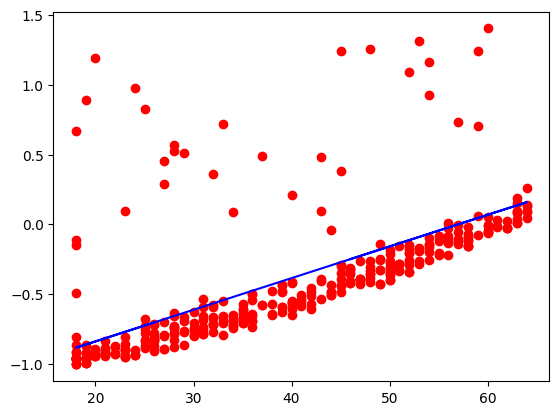

In [311]:
plt.scatter(X_test_non, y_test_non, color = 'red')
plt.plot(X_test_non, predictions_non, color = 'blue')

In [312]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### **Smoking=yes and bmi**

In [313]:
smoker_df = df[df['smoker'] == 'yes']
smoker_df.head(4)
inputs_bmi = smoker_df[['bmi']]
targets_bmi = smoker_df.charges
print('',inputs_bmi.shape)
print('',targets_bmi.shape)

 (274, 1)
 (274,)


In [314]:
X_train_bmi, X_test_bmi, y_train_bmi, y_test_bmi = train_test_split(inputs_bmi, targets_bmi, test_size=0.33)

In [315]:
model.fit(X_train_bmi, y_train_bmi)

LinearRegression()

In [316]:
predictions_bmi = model.predict(X_test_bmi)

In [317]:
mean_squared_error(y_test_bmi, predictions_bmi)

0.3091540866741288

In [318]:
print("w : ", model.coef_)
print("b : ", model.intercept_)

w :  [0.73625017]
b :  1.5688348287182083


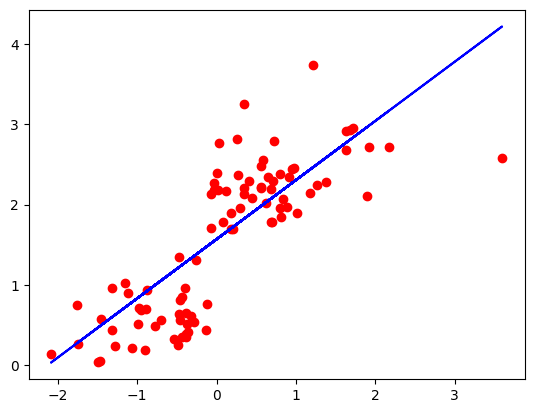

In [319]:
plt.scatter(X_test_bmi, y_test_bmi, color = 'red')
plt.plot(X_test_bmi, predictions_bmi, color = 'blue')

### **Smoking=no and bmi**

In [320]:
non_smoker_df = df[df['smoker'] == 'no']
non_smoker_df.head(4)
inputs_non_bmi = non_smoker_df[['bmi']]
targets_non_bmi = non_smoker_df.charges
print('',inputs_non_bmi.shape)
print('',targets_non_bmi.shape)

 (1064, 1)
 (1064,)


In [321]:
X_train_bmi_non, X_test_bmi_non, y_train_bmi_non, y_test_bmi_non = train_test_split(inputs_non_bmi, targets_non_bmi, test_size=0.33)

In [322]:
model.fit(X_train_bmi_non, y_train_bmi_non)

LinearRegression()

In [325]:
predictions_bmi_non = model.predict(X_test_bmi_non)

In [326]:
mean_squared_error(y_test_bmi_non, predictions_bmi_non)

0.22094401569063854

In [327]:
print("w : ", model.coef_)
print("b : ", model.intercept_)

w :  [0.05298792]
b :  -0.37473683837472904


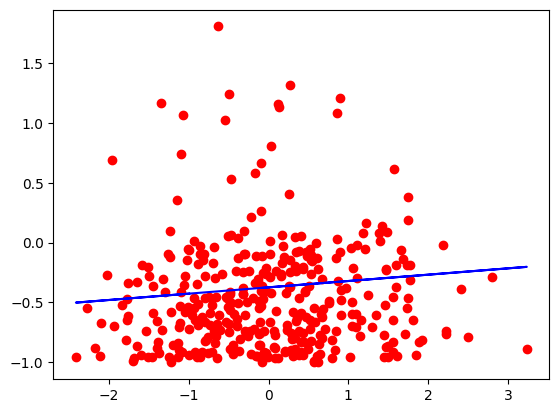

In [328]:
plt.scatter(X_test_bmi_non, y_test_bmi_non, color = 'red')
plt.plot(X_test_bmi_non, predictions_bmi_non, color = 'blue')

### **Multi feature**

### **Smoking=yes and bmi and age**

In [329]:
smoker_df = df[df['smoker'] == 'yes']
smoker_df.head(4)
inputs_bmi_age = smoker_df[['bmi', 'age']]
targets_bmi_age = smoker_df.charges
print('',inputs_bmi_age.shape)
print('',targets_bmi_age.shape)

 (274, 2)
 (274,)


In [330]:
X_train_bmi_age, X_test_bmi_age, y_train_bmi_age, y_test_bmi_age = train_test_split(inputs_bmi_age, targets_bmi_age, test_size=0.33)

In [331]:
model.fit(X_train_bmi_age, y_train_bmi_age)

LinearRegression()

In [332]:
predictions_bmi_age = model.predict(X_test_bmi_age)

In [333]:
mean_squared_error(y_test_bmi_age, predictions_bmi_age)

0.2712044697555169

In [334]:
print("w : ", model.coef_)
print("b : ", model.intercept_)

w :  [0.70000063 0.02061315]
b :  0.755910022226744


In [337]:
import plotly.express as px

<Axes: xlabel='smoker', ylabel='charges'>

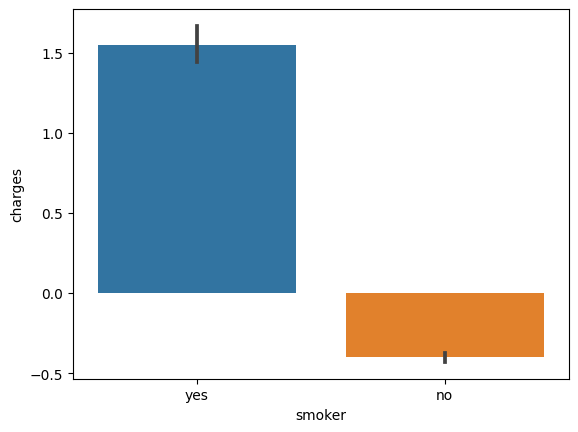

In [345]:
sns.barplot(data=df, x='smoker', y='charges')

### **Categorical values**

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [358]:
sex_map = {'female' : 1, 'male' : 0}
df['sex'] = df['sex'].map(sex_map)

In [359]:
smoker_map = {'yes' : 1, 'no' : 0}
df['smoker'] = df['smoker'].map(smoker_map)

In [350]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [351]:
enc.transform([['northeast']]).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.]])

In [353]:
one_hot = enc.transform(df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [354]:
df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [360]:
df.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,1,-0.453320,0,1,southwest,0.298584,0.0,0.0,0.0,1.0
1,18,0,0.509621,1,0,southeast,-0.953689,0.0,0.0,1.0,0.0
2,28,0,0.383307,3,0,southeast,-0.728675,0.0,0.0,1.0,0.0
3,33,0,-1.305531,0,0,northwest,0.719843,0.0,1.0,0.0,0.0
4,32,0,-0.292556,0,0,northwest,-0.776802,0.0,1.0,0.0,0.0


In [361]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker', 'sex', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = df[input_cols], df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = mean_squared_error(targets, predictions)
print('Loss:', loss)

Loss: 0.24908696540147937
